In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import G
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
plt.rcParams.update({'font.size':22})

In [3]:
class observables:
    
    def __init__(self, semiMajorAxis, eccentricity, eccentricAnomaly, totalMass):
         # initializing the cosmology
        self.a    = semiMajorAxis * u.kpc    # in kpc
        self.e    = eccentricity     # dimensionless
        self.eta  = eccentricAnomaly # dimensionless
        self.Mtot = totalMass * u.Msun       # in Msun
        self.G    = G.to(u.kpc**3 / u.s**2 / u.Msun) # in kpc^3/s^2/Msun
    
    @property
    def separation(self):
        return self.a * ( 1 - self.e * np.cos(self.eta) )
    
    @property
    def time(self):
        A = self.a**3 / (self.G * self.Mtot)
        B = self.eta - ( self.e * np.sin(self.eta) )
        return A**(-1/2) * B
    
    @property
    def vrad_kepler(self):
        A = self.a / (self.G * self.Mtot)
        B = self.e * np.sin(self.eta)
        C = 1 - (self.e*np.cos(self.eta))
        return A**(-1/2) * B/C
    
    @property
    def vtan_kepler(self):
        A = self.a / (self.G * self.Mtot)
        B = ( 1 - self.e**2 )**(1/2)
        C = 1 - ( self.e * np.cos(self.eta) )
        return A**(-1/2) * B/C
    
    @property
    def trueAnomaly(self):
        A = ( 1+self.e )/(1-self.e )
        B = np.tan( self.eta / 2 )
        return 2 * np.arctan( np.sqrt(A) * B )
    
    @property
    def xy(self):
        return self.separation * np.cos( self.trueAnomaly ), self.separation * np.sin( self.trueAnomaly )

    @property
    def vxy(self):
        return self.vrad_kepler * np.cos( self.trueAnomaly ) - self.vtan_kepler * np.sin( self.trueAnomaly ),  self.vrad_kepler * np.sin( self.trueAnomaly ) + self.vtan_kepler * np.cos( self.trueAnomaly )
    
    

---
Pick some values of the total mass, eccentricity, and semi-major axis

In [4]:
totalMass = 4e12 # total mass of LG or so in Msun
eccentricity = 0.9  # make it big
semiMajorAxis = 5 # in kpc
eccAnoms = np.linspace(0, 2*np.pi,100) # eta between 0 and 2pi

In [5]:
# create instance of observables for a range of eccentric anomalies
obsInst = observables(semiMajorAxis, eccentricity, eccAnoms, totalMass)


---


In [6]:
xs, ys = obsInst.xy
vxs, vys = obsInst.vxy
vrad = obsInst.vrad_kepler
vtan = obsInst.vtan_kepler
trueAnomaly = obsInst.trueAnomaly
seps = obsInst.separation

# want true anomaly to increase from 0 to 2pi as well
trueAnomalyCorrected = np.where(trueAnomaly<0,trueAnomaly+2*np.pi,trueAnomaly)

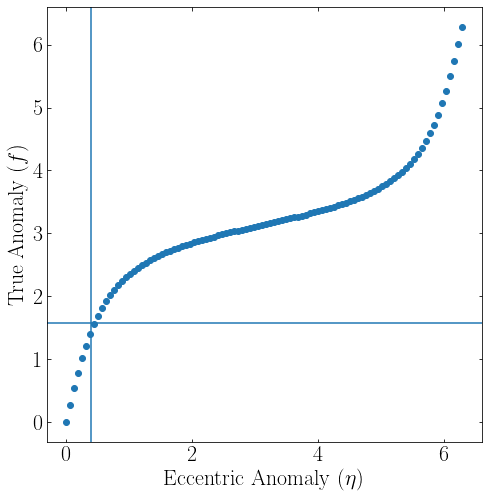

In [7]:
# eccentric anomaly vs true anomaly to check intuition

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(eccAnoms, trueAnomalyCorrected)
plt.xlabel(r"Eccentric Anomaly ($\eta$)")
plt.ylabel(r"True Anomaly ($f$)")
ax.axhline(np.pi/2)
ax.axvline(np.pi/8)
ax.set_aspect("equal")
plt.show()

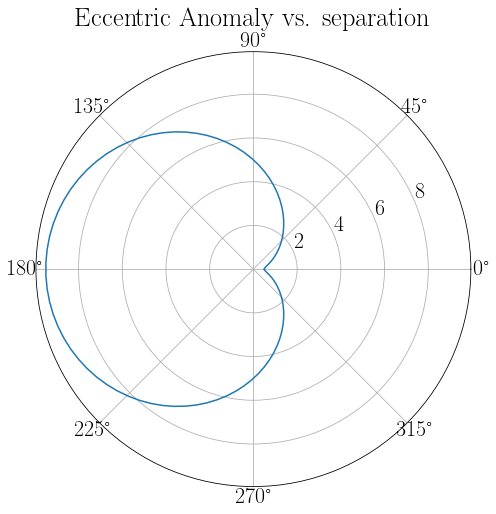

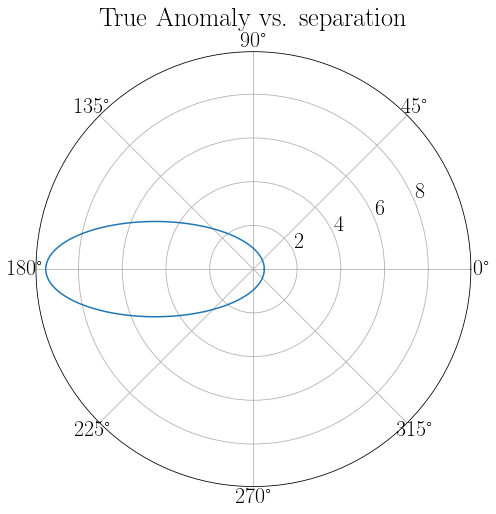

In [8]:
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': 'polar'})
plt.plot(eccAnoms, seps)
origin = ([0,1],[0,1])
plt.title("Eccentric Anomaly vs. separation")
plt.show()

fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': 'polar'})
plt.plot(trueAnomaly, seps)
origin = ([0,1],[0,1])
plt.title("True Anomaly vs. separation")
plt.show()

___
Plots of x & y and velocities

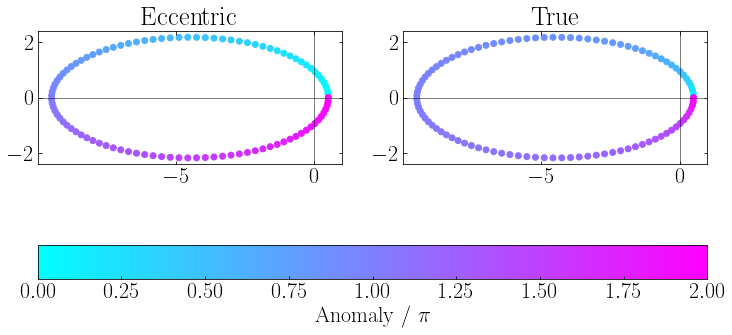

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,10))
scatterEcc = ax[0].scatter(xs, ys, c = eccAnoms/np.pi, cmap = "cool")
scatterTrue = ax[1].scatter(xs, ys, c = trueAnomalyCorrected/np.pi, cmap = "cool")
plt.colorbar(scatterEcc,ax=ax, label=r" Anomaly / $\pi$",location="bottom")
ax[0].set_title("Eccentric")
ax[1].set_title("True")
for axx in ax:
    axx.set_aspect("equal")
    axx.axhline(0,c="black",lw=0.5)
    axx.axvline(0,c="black",lw=0.5)
plt.show()

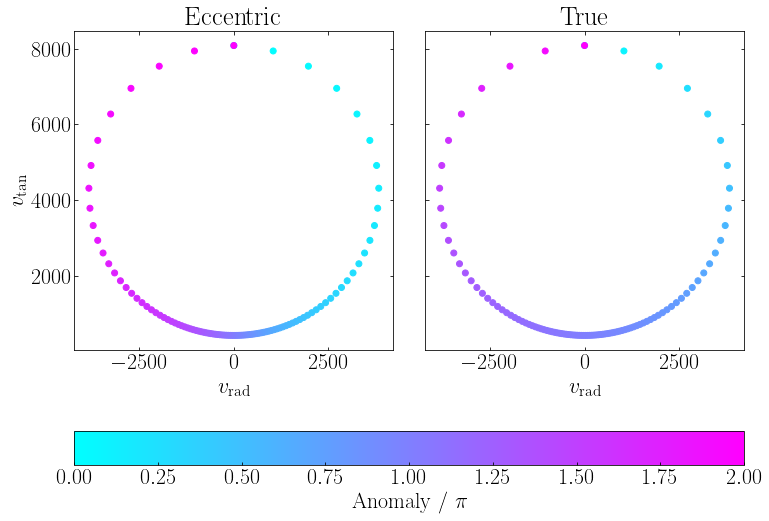

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,10),sharey=True)
plt.subplots_adjust(wspace=0.1)
scatterEcc = ax[0].scatter(vrad.to(u.km/u.s), vtan.to(u.km/u.s), c= eccAnoms/np.pi, cmap = "cool")
scatterTrue = ax[1].scatter(vrad.to(u.km/u.s), vtan.to(u.km/u.s), c=trueAnomalyCorrected/np.pi, cmap = "cool")
plt.colorbar(scatterEcc,ax=ax, label=r" Anomaly / $\pi$",location="bottom")
ax[0].set_title("Eccentric")
ax[1].set_title("True")
ax[0].set_ylabel(r"$v_{\rm tan}$")

for axx in ax:
    axx.set_aspect("equal")
    axx.set_xlabel(r"$v_{\rm rad}$")
#     axx.axhline(0,c="black",lw=0.5)
#     axx.axvline(0,c="black",lw=0.5)
plt.show()


# fig, ax = plt.subplots(figsize=(8,8))
# scatter = ax.scatter(vrad.to(u.km/u.s), vtan.to(u.km/u.s), c=trueAnomalyCorrected/np.pi)
# ax.xlabel = ()
# ax.set_aspect("equal")
# ax.set_xlabel(r"$v_{\rm rad}$")
# ax.set_xlabel(r"$v_{\rm tan}$")
# plt.colorbar(scatter, label=r"Eccentric Anomaly / $\pi$")
# plt.show()

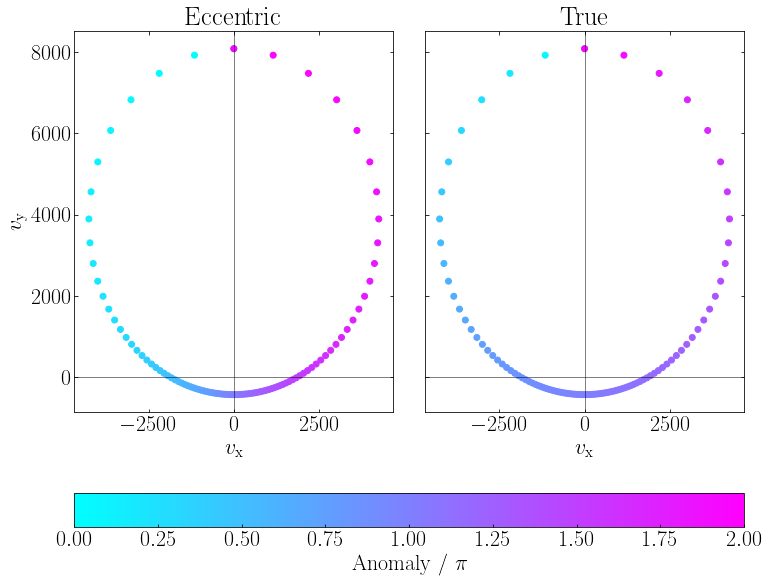

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,10),sharey=True)
plt.subplots_adjust(wspace=0.1)
scatterEcc = ax[0].scatter(vxs.to(u.km/u.s), vys.to(u.km/u.s), c=eccAnoms/np.pi, cmap = "cool")
scatterTrue = ax[1].scatter(vxs.to(u.km/u.s), vys.to(u.km/u.s), c=trueAnomalyCorrected/np.pi, cmap = "cool")
plt.colorbar(scatterEcc,ax=ax, label=r" Anomaly / $\pi$",location="bottom")
ax[0].set_title("Eccentric")
ax[1].set_title("True")
ax[0].set_ylabel(r"$v_{\rm y}$")

for axx in ax:
#     axx.set_aspect("equal")
    axx.set_xlabel(r"$v_{\rm x}$")
    axx.axhline(0,c="black",lw=0.5)
    axx.axvline(0,c="black",lw=0.5)
plt.show()


In [12]:
# create instance of observables for a range of eccentric anomalies
singleInst = observables(semiMajorAxis, eccentricity, np.array([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]), totalMass)


In [13]:
singleInst.trueAnomaly

array([ 0.00000000e+00,  2.69056584e+00,  3.14159265e+00, -2.69056584e+00,
       -1.06762233e-15])

In [14]:
singleInst.vrad_kepler.to(u.km/u.s)

<Quantity [ 0.00000000e+00,  1.66942936e+03,  1.07603228e-13,
           -1.66942936e+03, -4.08892265e-12] km / s>

In [15]:
singleInst.vtan_kepler.to(u.km/u.s)

<Quantity [8085.41541942,  808.54154194,  425.54817997,  808.54154194,
           8085.41541942] km / s>

In [16]:
x, y = singleInst.xy
vx, vy = singleInst.vxy

In [17]:
vx.to(u.km/u.s)

<Quantity [ 0.00000000e+00, -1.85492151e+03, -1.59717849e-13,
            1.85492151e+03,  4.54324738e-12] km / s>

In [18]:
vy.to(u.km/u.s)

<Quantity [ 8.08541542e+03,  1.94733633e-13, -4.25548180e+02,
            1.94733633e-13,  8.08541542e+03] km / s>